# 🛒 Exploratory Data Analysis (EDA): E-commerce Customer Behavior

This notebook provides a step-by-step EDA of the cleaned E-commerce Customer Behavior dataset. We'll explore the structure, quality, and key patterns in the data to gain actionable insights.

## 1. Import Libraries and Load Data

We'll import pandas, seaborn, and matplotlib, then load the cleaned dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\Task 5\E-commerce Customer Behavior - Cleaned Version.csv")

df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
343,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
344,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
345,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
346,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


## 2. Display Dataset Head and Shape

Let's view the first few rows and check the shape of the DataFrame.

In [2]:
# Display the first 5 rows
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [2]:
# Show the shape (rows, columns)
df.shape

(348, 11)

## 3. Check Data Types and Missing Values

We'll inspect data types and confirm there are no missing values.

In [3]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               348 non-null    int64  
 1   Gender                    348 non-null    object 
 2   Age                       348 non-null    int64  
 3   City                      348 non-null    object 
 4   Membership Type           348 non-null    object 
 5   Total Spend               348 non-null    float64
 6   Items Purchased           348 non-null    int64  
 7   Average Rating            348 non-null    float64
 8   Discount Applied          348 non-null    bool   
 9   Days Since Last Purchase  348 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.7+ KB


In [4]:
# Check for missing values in each column
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

## 4. Statistical Summary of Numerical Features

Let's get summary statistics for the numerical columns.

In [5]:
# Summary statistics for numerical features
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,275.887931,33.577586,847.793103,12.632184,4.023563,26.614943
std,101.304611,4.878024,361.692375,4.146079,0.579145,13.474750
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.750000,30.000000,505.750000,9.000000,3.500000,15.000000
50%,276.500000,32.000000,780.200000,12.000000,4.100000,23.000000
75%,363.250000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


## 5. Check for Duplicates

We'll check if there are any duplicate rows in the dataset.

In [6]:
# Count duplicate rows
df.duplicated().sum()

0

## 6. Correlation Heatmap

Visualize correlations among numerical features to identify potential relationships.

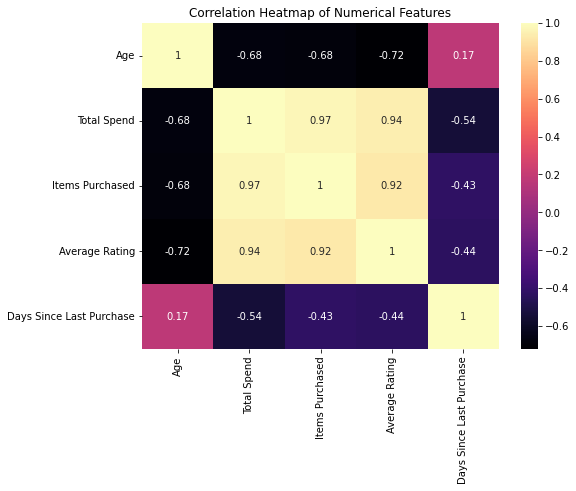

In [8]:
# Select relevant numerical columns
num_cols = ["Age", "Total Spend", "Items Purchased", "Average Rating", "Days Since Last Purchase"]

# Compute correlation matrix
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="magma")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## 7. Distribution of Satisfaction Level

Let's see the count of each Satisfaction Level in the dataset.

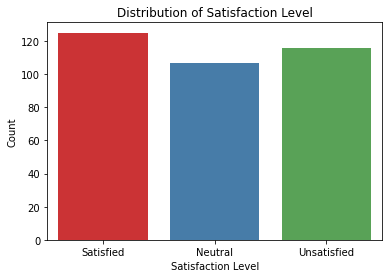

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Satisfaction Level", palette="Set1")
plt.title("Distribution of Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()

## 8. Age Distribution by Satisfaction Level

Visualize how Age is distributed for each Satisfaction Level.

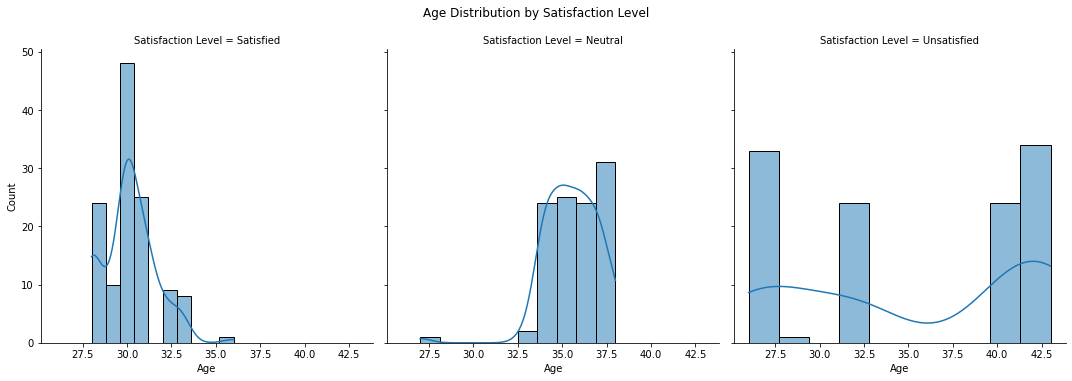

In [16]:
g = sns.FacetGrid(df, col="Satisfaction Level", height=5)
g.map(sns.histplot, "Age", bins=10, kde=True)
g.fig.suptitle("Age Distribution by Satisfaction Level", y=1.05)
plt.show()

## 9. Boxplot: Age by Satisfaction Level

Compare Age distributions across Satisfaction Levels using a boxplot.

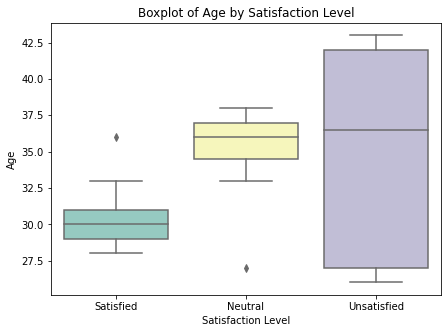

In [10]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Satisfaction Level", y="Age", data=df, palette="Set3")
plt.title("Boxplot of Age by Satisfaction Level")
plt.show()

## 10. Scatterplot: Age vs. Total Spend (Colored by Satisfaction)

Explore the relationship between Age and Total Spend, colored by Satisfaction Level.

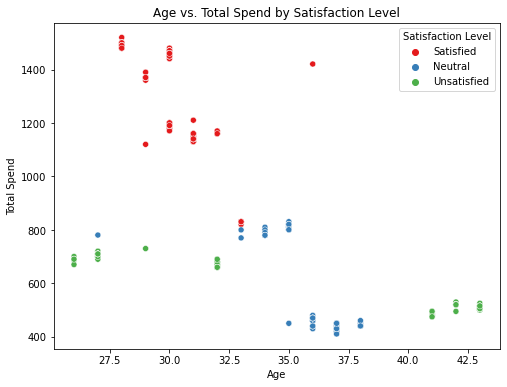

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Age", y="Total Spend", hue="Satisfaction Level", palette="Set1")
plt.title("Age vs. Total Spend by Satisfaction Level")
plt.show()

## 11. Pairplot of Key Features by Satisfaction Level

Visualize relationships between Age, Total Spend, and Average Rating, colored by Satisfaction Level.

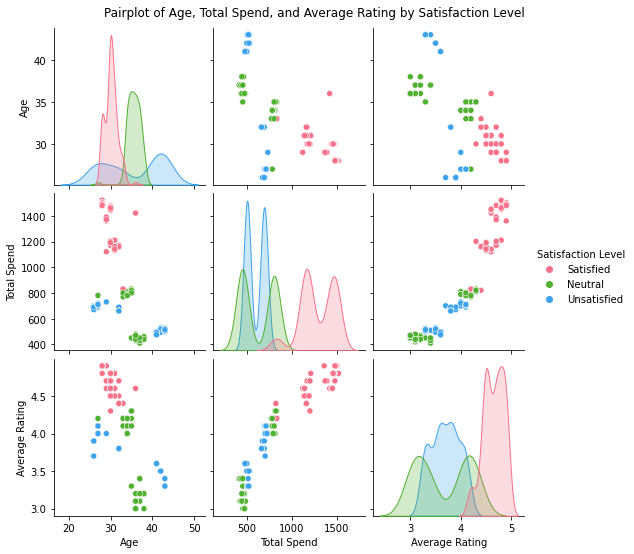

In [12]:
sns.pairplot(df, hue="Satisfaction Level", vars=["Age", "Total Spend", "Average Rating"], palette="husl")
plt.suptitle("Pairplot of Age, Total Spend, and Average Rating by Satisfaction Level", y=1.02)
plt.show()

## 12. Satisfaction Levels by Membership Type

Visualize how satisfaction varies across different membership types.

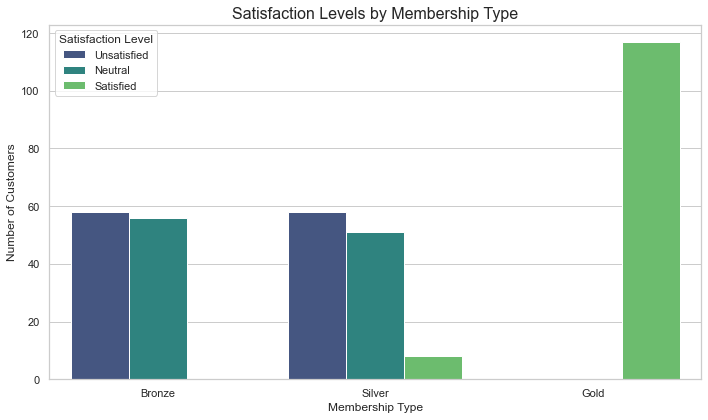

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\TASK 4\E-commerce Customer Behavior - Cleaned Version.csv")

# Set up the visual style
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Membership Type', hue='Satisfaction Level',
              palette='viridis', order=['Bronze', 'Silver', 'Gold'],
              hue_order=['Unsatisfied', 'Neutral', 'Satisfied'])

# Add titles and labels
plt.title('Satisfaction Levels by Membership Type', fontsize=16)
plt.xlabel('Membership Type')
plt.ylabel('Number of Customers')
plt.legend(title='Satisfaction Level')
plt.tight_layout()
plt.show()


## 13. Distribution of Items Purchased by Satisfaction Level

Visualize whether customers who purchase more items tend to be more satisfied.

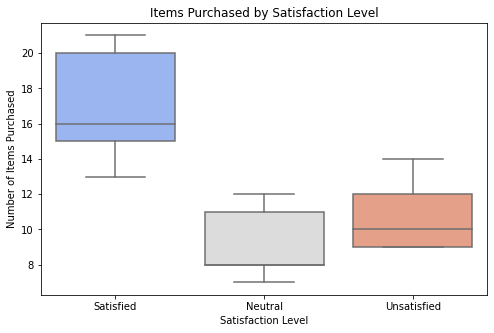

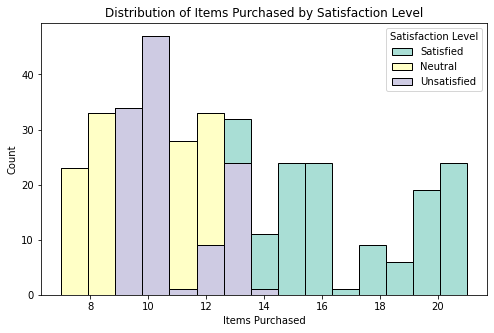

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Satisfaction Level", y="Items Purchased", data=df, palette="coolwarm")
plt.title("Items Purchased by Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Items Purchased")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Items Purchased", hue="Satisfaction Level", multiple="stack", bins=15, palette="Set3")
plt.title("Distribution of Items Purchased by Satisfaction Level")
plt.xlabel("Items Purchased")
plt.ylabel("Count")
plt.show()

## 14. Age Group Segmentation: Satisfaction and Spend

Segment customers into age bins and analyze satisfaction levels and average spend per group.

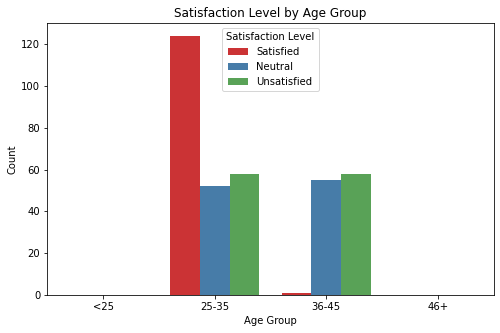

In [17]:
# Create age bins and labels
age_bins = [0, 24, 35, 45, 100]
age_labels = ['<25', '25-35', '36-45', '46+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# Countplot: Satisfaction Level by Age Group
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age Group', hue='Satisfaction Level', palette='Set1')
plt.title('Satisfaction Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Satisfaction Level')
plt.show()


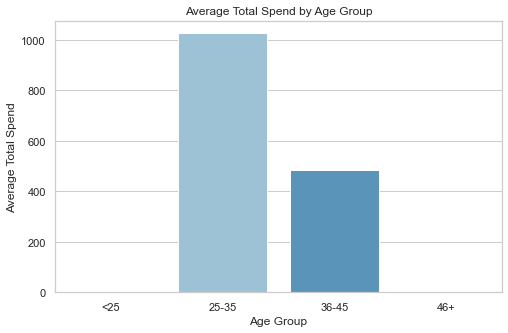

In [21]:
# Barplot: Average Spend by Age Group
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Age Group', y='Total Spend', ci=None, palette='Blues')
plt.title('Average Total Spend by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Spend')
plt.show()